In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.utils import to_categorical

import pickle

X = pickle.load(open("./drive/My Drive/Colab Notebooks/X.pickle","rb"))

y = pickle.load(open("./drive/My Drive/Colab Notebooks/y.pickle","rb"))

df_y =  to_categorical(y, num_classes=29)




Using TensorFlow backend.


In [2]:
df_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [3]:
X.shape[1:]

(50, 50, 1)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, df_y, test_size = 0.2, random_state = 101)


In [5]:
y_train.shape

(69600, 29)

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0
num_classes = 29

model = Sequential()

model.add( Conv2D(64, (3, 3),  input_shape=X.shape[1:]) )    # 64 neuron (3,3) window  
model.add( Activation('relu') )
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add( Conv2D(64, (3, 3)) )
model.add( Activation('relu') )
model.add( MaxPooling2D(pool_size=(2, 2) ))

model.add( Conv2D(128, (3, 3)) )
model.add( Activation('relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add( Conv2D(128, (3, 3)) )
model.add( Activation('relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add( Dense(64) )
model.add( Activation('relu') )
model.add( Dropout(0.5) )

model.add( Dense(64) )
model.add( Activation('relu') )
model.add( Dropout(0.5) )

model.add( Dense(num_classes) )
model.add( Activation('softmax') )

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
__________

In [8]:
model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Train on 69600 samples, validate on 17400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
69600/69600 [==============================] - 38s 539us/sample - loss: 2.1808 - acc: 0.3031 - val_loss: 0.8897 - val_acc: 0.7021
Epoch 2/30
69600/69600 [==============================] - 36s 514us/sample - loss: 0.9169 - acc: 0.6706 - val_loss: 0.3663 - val_acc: 0.8768
Epoch 3/30
69600/69600 [==============================] - 36s 512us/sample - loss: 0.5676 - acc: 0.7928 - val_loss: 0.1722 - val_acc: 0.9440
Epoch 4/30
69600/69600 [==============================] - 35s 510us/sample - loss: 0.4151 - acc: 0.8526 - val_loss: 0.1805 - val_acc: 0.9361
Epoch 5/30
69600/69600 [==============================] - 36s 512us/sample - loss: 0.3328 - acc: 0.8861 - val_loss: 0.0773 - val_acc: 0.9791
Epoch 6/30
69600/69600 [==============================] - 36s 512us/sample - loss: 0.2782 - acc: 0.9094 - val_loss: 0.0565 - val_acc: 0.9810
Epoch 7/30
69600/69600 [==============================] 

In [0]:
model.save('sign_language')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


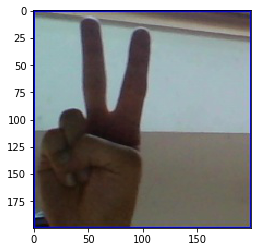

(200, 200)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0.]]


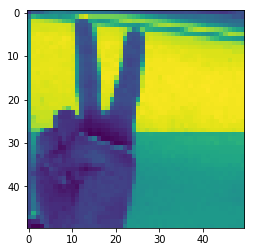

In [40]:
CATEGORIES = ['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z']


import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from scipy import misc


fname = './drive/My Drive/Colab Notebooks/V_test.jpg'  # path to current file

actual_image = misc.imread(fname)
plt.imshow(actual_image)
plt.show()

image = cv2.imread(fname,cv2.IMREAD_GRAYSCALE) # convert photo into gray scale
print(image.shape)                             # printing current shape
image = cv2.resize(image, (50,50))             # resizing into 50,50
plt.imshow(image)                              # display image
image = image.reshape(1,50,50,1)               # reshaping image into 1,50,50,1

model = tf.keras.models.load_model('sign_language')


prediction = model.predict([image])   
print(prediction)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


TypeError: ignored